In [2]:
import os
from pathlib import Path

wanted_cids = [os.path.splitext(fn.name)[0] for fn in Path('snaps').glob('*')] + \
              ['TRY-UNI-714a760b-6', 'WAR-XCH-b6889685-63']

In [3]:
import pandas as pd

inspirations = pd.read_csv('mproInspirational.csv')
inspirations

,cid,crystal,inspiration_hits
0,DAR-DIA-23aa0b97-6,x10178,"x0305,x0434"
1,DAR-DIA-23aa0b97-13,x2964,"x0104,x0434,x0995"
2,DAR-DIA-23aa0b97-14,x10996,"x0104,x0434,x0995"
3,DAR-DIA-23aa0b97-17,x2569,"x0305,x0434"
4,DAR-DIA-23aa0b97-20,x2563,"x0434,x1093"
...,...,...,...
95,EDJ-MED-6af13d92-2,x11276,x0678
96,EDJ-MED-6af13d92-3,x11294,x0678
97,MIC-UNK-66895286-1,x11532,x0678
98,MIC-UNK-66895286-3,x11540,x0678


In [15]:
from fragmenstein.demo import MPro

get_mol_safely = lambda name: MPro.get_mol(name) if name in MPro.get_hit_list() else Chem.Mol()

inspirations['crystal_mol'] = inspirations.crystal.apply(get_mol_safely)
inspirations['inspiration_mols'] = inspirations.inspiration_hits.apply(lambda names: [get_mol_safely(name) for name in names.split(',')])

In [16]:
from rdkit import Chem

Chem.MolToSmiles(inspirations.crystal_mol[0])
inspirations['crystal_smiles'] = inspirations['crystal_mol'].apply(Chem.MolToSmiles)
inspirations['inspiration_smileses'] = inspirations['inspiration_mols'].apply(lambda ms: list(map(Chem.MolToSmiles, ms)))

In [21]:
inspirations.loc[inspirations.cid.isin(wanted_cids)][['cid', 'crystal','inspiration_hits', 'crystal_smiles','inspiration_smileses']]

,cid,crystal,inspiration_hits,crystal_smiles,inspiration_smileses
4,DAR-DIA-23aa0b97-20,x2563,"x0434,x1093",O=C(Cc1cncc2ccccc12)Nc1ccccc1,"[O=C(Nc1ccccc1)Nc1cccnc1, CN1CCN(C(=O)Cc2c[nH]..."
9,TRY-UNI-714a760b-6,x2646,"x0107,x0434,x1382",Cc1ccncc1NC(=O)Cc1cccc(Cl)c1,"[CC(=O)Nc1cnccc1C, O=C(Nc1ccccc1)Nc1cccnc1, *C..."
13,TRY-UNI-714a760b-19,x11318,"x0107,x0434,x0995",Cc1c(N)cncc1NC(=O)Cc1cccc(C#N)c1,"[CC(=O)Nc1cnccc1C, O=C(Nc1ccccc1)Nc1cccnc1, Nc..."
19,JOR-UNI-2fc98d0b-12,x10236,"x0387,x0434",O=C(Nc1cccnc1)N(CCC1CCCCC1)c1cccc(Cl)c1,"[OC1CCN(Cc2ccsc2)CC1, O=C(Nc1ccccc1)Nc1cccnc1]"
23,ANN-UNI-26382800-5,x2600,"x0434,x1249",N#Cc1cccc(CC(=O)Nc2cccnc2)c1,"[O=C(Nc1ccccc1)Nc1cccnc1, N#Cc1ccc(CNC(=O)N2CC..."
30,MAK-UNK-6435e6c2-4,x1384,x0689,*CC(=O)Nc1cccc(N2CCCC2=O)c1,[*CC(=O)N1CCN(S(=O)(=O)c2cccs2)CC1]
41,GAB-REV-70cc3ca5-18,x3366,x0107,Cc1ccncc1NC(=O)Cc1ccc2nc[nH]c2c1,[CC(=O)Nc1cnccc1C]
44,BAR-COM-4e090d3a-47,x3305,x0434,Cn1cc(CNC(=O)N(CCc2ccccc2)Cc2cccnc2)nn1,[O=C(Nc1ccccc1)Nc1cccnc1]
45,BAR-COM-4e090d3a-49,x2764,x0434,N#CCOc1ccccc1C(=O)NCc1cnsc1,[O=C(Nc1ccccc1)Nc1cccnc1]
69,TRY-UNI-2eddb1ff-2,x10723,"x0387,x1382",Cc1ccncc1NC(=O)Cc1cncc(Cl)c1,"[OC1CCN(Cc2ccsc2)CC1, *CC(=O)N[C@H](C)c1cccc(C..."


In [32]:
# pymol pse version mismatch issue

import os
import pymol2

#os.mkdir('snaps_pse')

for i, row in inspirations.loc[inspirations.cid.isin(wanted_cids)].iterrows():
    with pymol2.PyMOL() as pymol:
        pymol.cmd.read_molstr(Chem.MolToMolBlock(row.crystal_mol), row.crystal)
        for hm, hn in zip(row.inspiration_mols, row.inspiration_hits.split(',')):
            pymol.cmd.read_molstr(Chem.MolToMolBlock(hm), hn)
        print(pymol.cmd.get_names())
        pymol.cmd.save(f'snaps_pse/{row.cid}.pse')

['x2563', 'x0434', 'x1093']
['x2646', 'x0107', 'x0434', 'x1382']
['x11318', 'x0107', 'x0434', 'x0995']
['x10236', 'x0387', 'x0434']
['x2600', 'x0434', 'x1249']
['x1384', 'x0689']
['x3366', 'x0107']
['x3305', 'x0434']
['x2764', 'x0434']
['x10723', 'x0387', 'x1382']


In [51]:
from rdkit.Chem import PandasTools

fragmenstein = PandasTools.LoadSDF('mols/fragmenstein.sdf')

In [56]:
inspirations['fragmenstein'] = inspirations.cid.apply( fragmenstein.set_index('ID').ROMol.to_dict().get )

In [60]:
r = inspirations.loc[inspirations.cid.isin(wanted_cids)]
xcodes = (','.join(r.crystal.to_list()) + ',' + \
        ','.join(r.inspiration_hits.to_list())).split(',')

with Chem.SDWriter('relevant_hits.sdf') as sw:
    for name in set(xcodes):
        sw.write(MPro.get_mol(name))
    for mol in r.fragmenstein:
        sw.write(mol)

In [64]:
' or '.join(wanted_cids)

'DAR-DIA-23aa0b97-20 or GAB-REV-70cc3ca5-18 or TRY-UNI-714a760b-19 or TRY-UNI-2eddb1ff-2 or JOR-UNI-2fc98d0b-12 or BAR-COM-4e090d3a-47 or ANN-UNI-26382800-5 or MAK-UNK-6435e6c2-4 or BAR-COM-4e090d3a-49 or TRY-UNI-714a760b-6 or WAR-XCH-b6889685-63'

In [69]:
' or '.join(r.crystal)

'x2563 or x2646 or x11318 or x10236 or x2600 or x1384 or x3366 or x3305 or x2764 or x10723'

In [70]:
' or '.join(','.join(r.inspiration_hits.to_list()).split(','))

'x0434 or x1093 or x0107 or x0434 or x1382 or x0107 or x0434 or x0995 or x0387 or x0434 or x0434 or x1249 or x0689 or x0107 or x0434 or x0434 or x0387 or x1382'

In [74]:
from fragmenstein.branding import divergent_colors

divergent_colors[3]

['#AED882', '#81D5FF', '#FFAFD0']

In [111]:
from IPython.display import display
from rdkit.Chem import Draw
from rdkit.Chem.Draw import MolDraw2DSVG

flatten = lambda mol: Chem.MolFromSmiles(Chem.MolToSmiles(mol))

for i, row in r.iterrows():
    print('disable all')
    print('#', row.cid, row.crystal)
    print(f'enable {row.cid} {row.crystal} {" ".join(row.inspiration_hits.split(","))}')
    print(f'zoom')
    print('ray 4266, 3100')
    print(f'save snaps2/{row.cid}.png')
    d = Draw.MolsToGridImage(list(map(flatten, [row.crystal_mol, *row.inspiration_mols])),
                             legends=[row.crystal, *row.inspiration_hits.split(',')],
                             useSVG=True)
    with open(f'snaps2/{row.cid}.svg', 'w') as fh:
        fh.write(d.data)

disable all
# DAR-DIA-23aa0b97-20 x2563
enable DAR-DIA-23aa0b97-20 x2563 x0434 x1093
zoom
ray 4266, 3100
save snaps2/DAR-DIA-23aa0b97-20.png
disable all
# TRY-UNI-714a760b-6 x2646
enable TRY-UNI-714a760b-6 x2646 x0107 x0434 x1382
zoom
ray 4266, 3100
save snaps2/TRY-UNI-714a760b-6.png
disable all
# TRY-UNI-714a760b-19 x11318
enable TRY-UNI-714a760b-19 x11318 x0107 x0434 x0995
zoom
ray 4266, 3100
save snaps2/TRY-UNI-714a760b-19.png
disable all
# JOR-UNI-2fc98d0b-12 x10236
enable JOR-UNI-2fc98d0b-12 x10236 x0387 x0434
zoom
ray 4266, 3100
save snaps2/JOR-UNI-2fc98d0b-12.png
disable all
# ANN-UNI-26382800-5 x2600
enable ANN-UNI-26382800-5 x2600 x0434 x1249
zoom
ray 4266, 3100
save snaps2/ANN-UNI-26382800-5.png
disable all
# MAK-UNK-6435e6c2-4 x1384
enable MAK-UNK-6435e6c2-4 x1384 x0689
zoom
ray 4266, 3100
save snaps2/MAK-UNK-6435e6c2-4.png
disable all
# GAB-REV-70cc3ca5-18 x3366
enable GAB-REV-70cc3ca5-18 x3366 x0107
zoom
ray 4266, 3100
save snaps2/GAB-REV-70cc3ca5-18.png
disable all
# BAR-

set ray_shadow, 0

split_states relevant_hits



WAR-XCH-b6889685-63 missing

color white, element C

# green
color 0xAED882, element C and (DAR-DIA-23aa0b97-20 or GAB-REV-70cc3ca5-18 or TRY-UNI-714a760b-19 or TRY-UNI-2eddb1ff-2 or JOR-UNI-2fc98d0b-12 or BAR-COM-4e090d3a-47 or ANN-UNI-26382800-5 or MAK-UNK-6435e6c2-4 or BAR-COM-4e090d3a-49 or TRY-UNI-714a760b-6)

# blue
color 0x81D5FF, element C and (x2563 or x2646 or x11318 or x10236 or x2600 or x1384 or x3366 or x3305 or x2764 or x10723)

# red
color 0xFFAFD0, element C and (x0434 or x1093 or x0107 or x0434 or x1382 or x0107 or x0434 or x0995 or x0387 or x0434 or x0434 or x1249 or x0689 or x0107 or x0434 or x0434 or x0387 or x1382)



In [43]:
name = 'x0434'
mol = MPro.get_mol(name)

f"cmd.read_molstr('{Chem.MolToMolBlock(mol)}', '{name}')"

"cmd.read_molstr('x0434\n     RDKit          3D\n\n 16 17  0  0  0  0  0  0  0  0999 V2000\n    9.1540    0.6740   20.8440 O   0  0  0  0  0  0  0  0  0  0  0  0\n    8.6000   -0.2440   21.3530 C   0  0  0  0  0  0  0  0  0  0  0  0\n    9.2390   -0.9740   22.4210 N   0  0  0  0  0  0  0  0  0  0  0  0\n   10.5250   -0.4980   22.8250 C   0  0  0  0  0  0  0  0  0  0  0  0\n   10.5630    0.3330   23.9260 C   0  0  0  0  0  0  0  0  0  0  0  0\n   11.7690    0.8430   24.3410 C   0  0  0  0  0  0  0  0  0  0  0  0\n   12.9280    0.5280   23.6450 C   0  0  0  0  0  0  0  0  0  0  0  0\n   12.8820   -0.3030   22.5390 C   0  0  0  0  0  0  0  0  0  0  0  0\n   11.6690   -0.8130   22.1180 C   0  0  0  0  0  0  0  0  0  0  0  0\n    7.2910   -0.6660   20.9230 N   0  0  0  0  0  0  0  0  0  0  0  0\n    6.6110    0.0230   19.8590 C   0  0  0  0  0  0  0  0  0  0  0  0\n    5.4070    0.6480   20.1420 C   0  0  0  0  0  0  0  0  0  0  0  0\n    4.7780    1.3080   19.0980 C   0  0  0  0  0  0  0  

In [118]:
m = pd.read_csv('/Users/user/Downloads/moonshot_submissions.csv')

/var/folders/70/28pvwk5s63q9xd4mwxj039hm0000gp/T/ipykernel_36219/1512592747.py:1: DtypeWarning: Columns (4,7,8,10,11,12,13,14,15,16,17,18,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,67,68,71,72,73,74,75,76,77,85,86,87,88,91,92,93,94,95,96,97,105,106,107,108,111,112,113,114,115,116,117,125,126,127,128,131,132,133,134,135,136,137,145,146,147,148,151,152,153,154,155,156,157,165,166,167,168,171,172,173,174,175,176,177,185,186,187,188,191,192,193,194,195,196,197,205,206,207,208,211,212,213,214,215,216,217,225,226,227,228,234,235,236,237,238,239,240,256,257,258,259,260,278) have mixed types. Specify dtype option on import or set low_memory=False.
  m = pd.read_csv('/Users/user/Downloads/moonshot_submissions.csv')


In [160]:
m.loc[m['rationale'].astype(str).str.contains('BRICS') & ~m['Structure ID'].isna()]

,CID (canonical),SMILES,CID,CID (canonical).1,CID (old format),Postera Link,InChIKey,creator,rationale,Submission Notes,...,inferred_submission_date,inferred_submission_month,N_chars,N_words,N_words_cutoff,classified_method,flesch,dale_chall,okay,initial_screen
3309,WAR-XCH-72a8c209-5,O=C(CCl)N1CCCC(N(CC2CCCCC2)C2CCC(O)CC2)C1,WAR-XCH-72a8c209-5,WAR-XCH-72a8c209-5,WAR-XCH-72a-5,https://covid.postera.ai/covid/submissions/72a...,RDWDZJBWCZMNFY-UHFFFAOYSA-N,"Warren Thompson, XChem - Diamond Light Source",1. Data combo of top 40 scoring docking compou...,NaN,...,2020-04-03,4,470,79,79.0,DOCKING,6.112317,12.410152,True,False


In [146]:
row = m.loc[m['CID (canonical)'].astype(str).str.contains('WAR-XCH') & ~m['Structure ID'].isna()].iloc[0]


row[['CID (canonical)','Structure ID', 'rationale',
 'Submission Notes',
 'fragments',]] 

CID (canonical)                                    WAR-XCH-72a8c209-5
Structure ID                                                   x10728
rationale           1. Data combo of top 40 scoring docking compou...
Submission Notes                                                  NaN
fragments                                     x1418,x1458,x1478,x1493
Name: 3309, dtype: object

In [159]:
row.rationale

"1. Data combo of top 40 scoring docking compounds plus all covalent frags\r\n2. BRICS algo to break down into synthetic frags (Size 8)\r\n3. BRICS algo build frags\r\n4. Filter rule of five\r\n5. Filter using regression model trained on John's docking scores with predicted scores < 0.5 passing\r\n6. Filter comparing to submission list (Dated 31032020)\r\n7. Made some adjustments to make less toxic by adding derivatives of the chloroacetoamide compounds as shared in the forum"

In [214]:
with Chem.SDWriter('WAR-XCH-72a8c209-5.sdf') as w:
    w.write(MPro.get_mol('x10728'))
    for h in 'x1418,x1458,x1478,x1493,x10236,x0387,x0434,x0991'.split(','):
        w.write(MPro.get_mol(h))

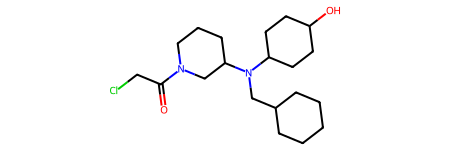

In [156]:
Chem.MolFromSmiles(row.SMILES)

In [157]:
row.SMILES

'O=C(CCl)N1CCCC(N(CC2CCCCC2)C2CCC(O)CC2)C1'

In [158]:
for h in 'x1418,x1458,x1478,x1493'.split(','):
    print(Chem.MolToSmiles(MPro.get_mol(h)))

*CC(=O)N1CCN(Cc2cccs2)CC1
*CC(=O)N1CCC(C(=O)N(C)C(C)C)CC1
*CC(=O)Nc1cccnc1Cl
*CC(=O)N1CCN(C(C)=O)CC1


In [ ]:
WAR-XCH-72a8c209-5

0               NaN
1               NaN
2               NaN
3        2020-04-09
4               NaN
            ...    
20004           NaN
20005           NaN
20006           NaN
20007           NaN
20008           NaN
Name: Shipment Date, Length: 20009, dtype: object

In [173]:
m['words'] = m['rationale'].astype(str) +' '+ m['Submission Notes'].astype(str)

sum(m['words'].astype(str).str.contains('BRICS') & ~m['Structure ID'].isna()),\
sum(m['words'].astype(str).str.contains('BRICS') & ~m['Shipment Date'].isna()),\
sum(m['words'].astype(str).str.contains('BRICS'))

(1, 31, 241)

In [174]:
sum(m['words'].astype(str).str.contains('eye') & ~m['Structure ID'].isna()),\
sum(m['words'].astype(str).str.contains('eye') & ~m['Shipment Date'].isna()),\
sum(m['words'].astype(str).str.contains('eye'))

(33, 190, 1932)

In [168]:
m.loc[]

,CID (canonical),SMILES,CID,CID (canonical).1,CID (old format),Postera Link,InChIKey,creator,rationale,Submission Notes,...,inferred_submission_month,N_chars,N_words,N_words_cutoff,classified_method,flesch,dale_chall,okay,initial_screen,words
1513,WAR-XCH-b72a1bbc-1,NS(=O)(=O)c1ccc(N2CCSCC2)cc1,WAR-XCH-b72a1bbc-1,WAR-XCH-b72a1bbc-1,WAR-XCH-b72-1,https://covid.postera.ai/covid/submissions/b72...,ZAVFQSIDTJOAIP-UHFFFAOYSA-N,"Warren, XChem - Diamond Light Source",This design focused on exploring the chemical ...,Viewing in Fragalysis - overlaying all the fra...,...,3,836,126,126.0,DOCKING,10.529921,11.184843,True,False,This design focused on exploring the chemical ...
1516,WAR-XCH-b72a1bbc-4,Cc1ccncc1-c1ccc(S(N)(=O)=O)cc1,WAR-XCH-b72a1bbc-4,WAR-XCH-b72a1bbc-4,WAR-XCH-b72-4,https://covid.postera.ai/covid/submissions/b72...,RTCQJIXHCLXJOD-UHFFFAOYSA-N,"Warren, XChem - Diamond Light Source",This design focused on exploring the chemical ...,Viewing in Fragalysis - overlaying all the fra...,...,3,836,126,126.0,DOCKING,10.529921,11.184843,True,False,This design focused on exploring the chemical ...
1519,WAR-XCH-b72a1bbc-7,NS(=O)(=O)c1ccc(N2CCC(c3ccco3)CC2)cc1,WAR-XCH-b72a1bbc-7,WAR-XCH-b72a1bbc-7,WAR-XCH-b72-7,https://covid.postera.ai/covid/submissions/b72...,KOQXCFPVDMPMFP-UHFFFAOYSA-N,"Warren, XChem - Diamond Light Source",This design focused on exploring the chemical ...,Viewing in Fragalysis - overlaying all the fra...,...,3,836,126,126.0,DOCKING,10.529921,11.184843,True,False,This design focused on exploring the chemical ...
1520,WAR-XCH-b72a1bbc-8,NS(=O)(=O)c1ccc(N2CCC(c3nc4ccccc4s3)CC2)cc1,WAR-XCH-b72a1bbc-8,WAR-XCH-b72a1bbc-8,WAR-XCH-b72-8,https://covid.postera.ai/covid/submissions/b72...,WTZNVJROLONLNP-UHFFFAOYSA-N,"Warren, XChem - Diamond Light Source",This design focused on exploring the chemical ...,Viewing in Fragalysis - overlaying all the fra...,...,3,836,126,126.0,DOCKING,10.529921,11.184843,True,False,This design focused on exploring the chemical ...
1521,WAR-XCH-b72a1bbc-9,COC1CCN(c2ccc(S(N)(=O)=O)cc2)CC1,WAR-XCH-b72a1bbc-9,WAR-XCH-b72a1bbc-9,WAR-XCH-b72-9,https://covid.postera.ai/covid/submissions/b72...,FLYGVIRGNXWEDW-UHFFFAOYSA-N,"Warren, XChem - Diamond Light Source",This design focused on exploring the chemical ...,Viewing in Fragalysis - overlaying all the fra...,...,3,836,126,126.0,DOCKING,10.529921,11.184843,True,False,This design focused on exploring the chemical ...
1522,WAR-XCH-b72a1bbc-10,NS(=O)(=O)c1ccc(N2CCC(N3CCCCC3)CC2)cc1,WAR-XCH-b72a1bbc-10,WAR-XCH-b72a1bbc-10,WAR-XCH-b72-10,https://covid.postera.ai/covid/submissions/b72...,BSBCDKAIXKUVKH-UHFFFAOYSA-N,"Warren, XChem - Diamond Light Source",This design focused on exploring the chemical ...,Viewing in Fragalysis - overlaying all the fra...,...,3,836,126,126.0,DOCKING,10.529921,11.184843,True,False,This design focused on exploring the chemical ...
1523,WAR-XCH-b72a1bbc-11,NS(=O)(=O)c1ccc(N2CCC(N3CCCCCC3)CC2)cc1,WAR-XCH-b72a1bbc-11,WAR-XCH-b72a1bbc-11,WAR-XCH-b72-11,https://covid.postera.ai/covid/submissions/b72...,NMONTLDKYFRAMZ-UHFFFAOYSA-N,"Warren, XChem - Diamond Light Source",This design focused on exploring the chemical ...,Viewing in Fragalysis - overlaying all the fra...,...,3,836,126,126.0,DOCKING,10.529921,11.184843,True,False,This design focused on exploring the chemical ...
1526,WAR-XCH-b72a1bbc-14,NS(=O)(=O)c1ccc(N2CCC(CO)CC2)cc1,WAR-XCH-b72a1bbc-14,WAR-XCH-b72a1bbc-14,WAR-XCH-b72-14,https://covid.postera.ai/covid/submissions/b72...,QDFXYCUFNXISNG-UHFFFAOYSA-N,"Warren, XChem - Diamond Light Source",This design focused on exploring the chemical ...,Viewing in Fragalysis - overlaying all the fra...,...,3,836,126,126.0,DOCKING,10.529921,11.184843,True,False,This design focused on exploring the chemical ...
1527,WAR-XCH-b72a1bbc-15,NS(=O)(=O)c1ccc(N2CCC(c3ccncc3)CC2)cc1,WAR-XCH-b72a1bbc-15,WAR-XCH-b72a1bbc-15,WAR-XCH-b72-15,https://covid.postera.ai/covid/submissions/b72...,AMEJVGYWAZCBBK-UHFFFAOYSA-N,"Warren, XChem - Diamond Light Source",This d

In [176]:
from rdkit.Chem import PandasTools

In [177]:
PandasTools.AddMoleculeColumnToFrame(m,'SMILES','mol',includeFingerprints=True)

[12:42:48] WARNING: not removing hydrogen atom without neighbors
[12:42:49] WARNING: not removing hydrogen atom without neighbors


In [203]:
worked[].iloc[0]

'2020-05-26'

In [210]:
worked.loc[(worked.mol >= Chem.MolFromSmiles('C1CCCCC1')) & ~worked.pIC50.isna()].sort_values('IC50')[['CID (canonical)','SMILES', 'pIC50', 'Structure ID', 'Shipment Date', 'fragments']]

,CID (canonical),SMILES,pIC50,Structure ID,Shipment Date,fragments
8029,TAT-ENA-80bfd3e5-7,CSC1=C(C#N)C2(CCCCC2)C(C#N)=C(NC(=O)CCl)N1,5.903090,x11579,2020-09-22,NaN
208,JOR-UNI-2fc98d0b-12,O=C(Nc1cccnc1)N(CCC1CCCCC1)c1cccc(Cl)c1,5.514279,x10236,2020-05-26,"x0387,x0434,x0991"
137,TRY-UNI-714a760b-16,Cc1ccncc1NC(=O)C(C)C1CCCCC1,NaN,x11044,2020-06-01,"x0107,x0434,x0678,x0748,x0995,x1382"
1277,ALE-HEI-f28a35b5-9,O=C(CC1CCCCC1)Nc1cccnc1,NaN,x0678,2021-04-16,"x0107,x0434,x0967,x0395,x0678,x0991,x1093"
3309,WAR-XCH-72a8c209-5,O=C(CCl)N1CCCC(N(CC2CCCCC2)C2CCC(O)CC2)C1,NaN,x10728,2020-06-24,"x1418,x1458,x1478,x1493"
4498,AAR-POS-d2a4d1df-12,O=C(NCCc1ccncc1)NC1CCCCC1,NaN,x0540,2021-04-16,x0072
5353,MAT-POS-590ac91e-19,Cc1ccncc1NC(=O)[C@@H]1[C@H]2CCCC[C@H]21,NaN,x10626,2020-06-24,x0072
5357,MAT-POS-590ac91e-23,Cc1ccncc1NC(=O)CC1CC2CC2C1,NaN,x10575,2020-06-16,x0072
5359,MAT-POS-590ac91e-25,Cc1ccncc1NC(=O)CC12CCCC1C2,NaN,x10478,2020-06-16,x0072


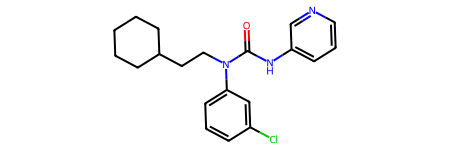

In [198]:
Chem.MolFromSmiles('O=C(Nc1cccnc1)N(CCC1CCCCC1)c1cccc(Cl)c1')

In [199]:
worked.loc[worked.mol >= Chem.MolFromSmiles('Nc1ccccc1')].sort_values('IC50')[['CID (canonical)','SMILES', 'pIC50', 'Structure ID']]

,CID (canonical),SMILES,pIC50,Structure ID
13159,MAT-POS-f2460aef-1,CC(C)(C)c1ccc(N(C(=O)c2ccco2)[C@H](C(=O)NCCc2c...,7.000000,N0050
13207,ALP-POS-477dc5b7-2,O=C(Nc1cncc2ccccc12)C1CCNc2ccc(Cl)cc21,6.586700,x12171
13211,PET-UNK-1901c25b-1,CN(C)c1ccc(N(Cc2ccsc2)C(=O)Cc2cncc3ccccc23)cc1,6.545155,x11790
12944,ALP-POS-6d04362c-2,CN(C)c1ccc(N(Cc2cccc(Cl)c2)C(=O)Cn2nnc3ccccc32...,6.303644,x12423
13548,CHO-MSK-00c5269a-2,COc1ccc(N(Cc2cccc(Cl)c2)C(=O)Cn2nnc3ccccc32)cc1,5.943095,x12177
13213,ROB-IMP-e811baff-1,CNC(=O)Nc1ccc(N(Cc2ccsc2)C(=O)Cn2nnc3ccccc32)cc1,5.847712,x11798
6329,ALP-POS-c59291d4-2,CCC(=O)Nc1ccc(N(Cc2ccsc2)C(=O)Cn2nnc3ccccc32)cc1,5.787812,x10871
208,JOR-UNI-2fc98d0b-12,O=C(Nc1cccnc1)N(CCC1CCCCC1)c1cccc(Cl)c1,5.514279,x10236
13253,ERI-UCB-a0b0dbcb-4,O=C(c1cc(=O)[nH]c2ccccc12)N1CCN(c2cccc(C(F)(F)...,5.420216,x11616
6330,ALP-POS-c59291d4-3,O=C(Nc1ccc(N(Cc2ccsc2)C(=O)Cn2nnc3ccccc32)cc1)...,5.399027,x10870


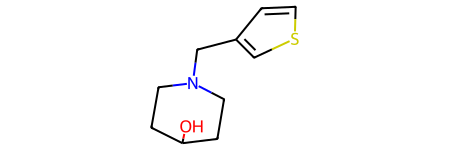

In [211]:
MPro.get_mol('x0387')

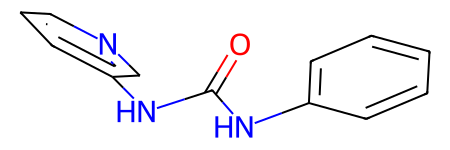

In [212]:
MPro.get_mol('x0434')

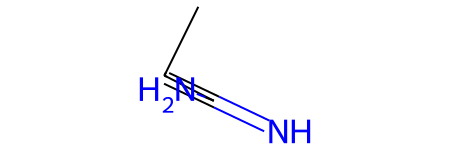

In [213]:

MPro.get_mol('x0991')